Using ZeroMQ islands in an archipelago
====================

While ZeroMQ islands can be used standalone (without being part of an archipelago), they are used most effectively inside one. The idea is that through archipelago migration strategies, local islands exchange individuals with a single ZeroMQ inside it, which acts as a nexus to send solutions to other archipelagos with ZeroMQ islands inside them. This also works in reverse; a ZeroMQ island is constantly receiving population broadcasts from its peers, so the archipelago can migrate them from there to other islands.

<img src="https://camo.githubusercontent.com/281c87e6ee5c4831d80643d126c01fd6f23b3897/687474703a2f2f692e696d6775722e636f6d2f7a51764465666c2e706e67">

In this image there are three archipelagos, each with a different topology. The dotted lines represent the ZeroMQ network, which is always fully connected.

To simplify the example, the following program instantiates an archipelago with three local islands and one ZeroMQ island.

In [1]:
from PyGMO import *
import time

prob = problem.schwefel(10)
algo = algorithm.de(10)

zmqisl = zmq_island(algo, prob, 20)
zmqisl.set_broker_details("127.0.0.1", 6379)
zmqisl.set_token("schwefel10_de10_pop20")
zmqisl.set_ip("127.0.0.1")

archi = archipelago(algo, prob, 3, 20)
archi.push_back(zmqisl)

def evolve():
    archi.evolve(1)
    for isl in archi:
        if isl.get_name().startswith("ZMQ"):
            return(isl.population.champion.x[0])

    time.sleep(1)

The following demonstrations will use graphics and plots, so we need to load matplotlib:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

Now we will evolve the archipelago 20 times and record the value of the best individual in the ZeroMQ island over time, and plot the results.

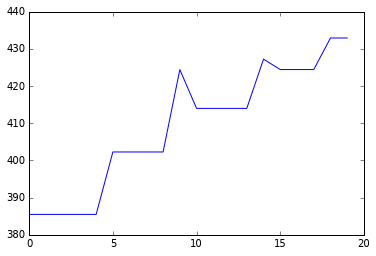

In [3]:
results = [evolve() for _ in range(20)]
plt.plot(results)

After resetting the archipelago and ZeroMQ island, I'll start another instance of this code on a different window (because IPython can't execute two processes simultaneously) and see how the performance compares.

In [4]:
del zmqisl

zmqisl2 = zmq_island(algo, prob, 20)
zmqisl2.set_broker_details("127.0.0.1", 6379)
zmqisl2.set_token("schwefel10_de10_pop20")
zmqisl2.set_ip("127.0.0.1")

archi2 = archipelago(algo, prob, 3, 20)
archi2.push_back(zmqisl2)

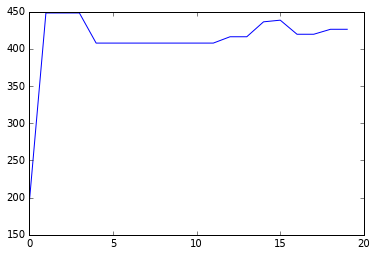

In [5]:
results2 = [evolve() for _ in range(20)]
plt.plot(results2)

As you can see, we get to the result much more quickly because the off-screen instance of this program had been working for a few seconds and was very close to the answer already.